<a href="https://colab.research.google.com/github/JFGoes/PCT30038--CalculoNumerico/blob/master/MetodosZeroFuncao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# -*- coding: utf-8 -*-
"""
Metodos para encontrar zeros de funções
Autor: Prof. Josecley Fialho Góes
Data da última modificação: 27/11/22

Métodos:
1 - Método da Bissecção
2 - Método do Ponto Fixo
3 - Método de Newton-raphson
4 - Método da Secante
"""

import matplotlib.pyplot as plt

In [3]:
#Metodo do Ponto Fixo
def Bisseccao(f,a,b,tol,iter_max=100):
  """
  ########################## Método do Ponto Fixo #########################
  Esta função encontra o zero de uma função f(x) definida com a função lambda.
  Variáveis de entrada:
  f           --> Função definida
  a          --> intervalo em x0
  b          --> intervalo em x1
  tol         --> Erro estimado
  iter_max    --> Iteração máxima

  Variáveis de saída:
  sol         --> Zero da função: f(sol) = 0
  lerro       --> Vetor do erro por iteração

  Exemplo 01: 
  f = lambda x: x**3 - x - 1  --> função definida
  a = 1.0                    --> intervalo em x0
  b = 2.0                    --> intervalo em x1
  err = 5*10**(-6)            --> Estimativa do Erro esperado
  sol,lerro = Bisseccao(f,x0,x1,err,100) --> chamada da função Bissecção

   Exemplo 02: 
  f = lambda x: x**3 - x - 1                   --> função definida
  sol,lerro = Bisseccao(f,1.0,2.0,0.0001,100)  --> chamada da função da Bissecção

  """
  lerro =[] # lista para plot do erro
  iter = 0
  fa = f(a) # avaliacao da função na extremidade inferior do intervalo: a
  fb = f(b) # avaliacao da função na extremidade superior do intervalo: b
  if (fa * fb) > 0:
    print(f'Intervalo [{a},{b}] sem raiz')
    return (0, 0)
  erro = abs(b-a) # calculo do erro: | b-a| < tol
  lerro.append(erro) # adicionar valores do erro

  if erro < tol:
    print(f'A solução é: {(b + a)*0.5:.6f}')
    return (x0,lerro)

  print(f'{"iter":^5}| {"b":^9}| {"a":^9}| {"f(x)":^8} | {"|b-a|":^9} ')
  print('-----|----------|----------|----------|----------|-----------')
  
  while iter < iter_max:
    
    x = (a + b)/2.0
    fx = f(x)
    erro = abs(b-a)# calculo do erro: | x1-x0| < tol
    print(f'{iter:^5}| {a:^9.6f}| {b:^9.6f}| {fx:^8.4f} | {erro:^2.4E}')
    
    if fx == 0 or erro < tol: # avaliação de convergência
      lerro.append(erro)
      plt.plot(lerro,'r')
      plt.title("Gráfico do Erro x iterações")
      plt.xlabel("iter")
      plt.ylabel("erro")
      print (f'A solução é: {x:.6f}')
      return (x,lerro)

    if fa * fx > 0: # Verificação da raiz no intervalo ou não
      a = x
    else:
      b = x

    fa = f(a)
    lerro.append(erro)
    
    iter+=1
    
  
  raise NameError ('O método não convergiu após '+ str(iter_max) + ' iterações')

# Fim do método da Bissecção

In [4]:
#Metodo do Ponto Fixo
def PontoFixo(f,fphi,x0,tol,iter_max=100):
  """
  ########################## Método do Ponto Fixo #########################
  Esta função encontra o zero de uma função f(x) definida com a função lambda.
  Variáveis de entrada:
  f           --> Função definida
  fphi          --> Derivada da função definida
  x0          --> Chute inicial
  tol         --> Erro estimado
  iter_max    --> Iteração máxima

  Variáveis de saída:
  sol         --> Zero da função: f(sol) = 0
  lerro       --> Vetor do erro por iteração

  Exemplo 01: 
  f = lambda x: x**3 - x - 1  --> função definida
  fphi = lambda x: 3*x**2 -1  --> Função Phi
  x0 = 0.5                    --> chute inicial x0
  err = 5*10**(-6)            --> Estimativa do Erro esperado
  sol,lerro = PontoFixo(f,fphi,x0,err,100) --> chamada da função Ponto Fixo

   Exemplo 02: 
  f = lambda x: x**3 - x - 1                    --> função definida
  fphi = lambda x: 3*x**2 -1                    --> Função Phi
  sol,lerro = PontoFixo(f,fphi,0.5,0.0001,100)  --> chamada da função do Ponto Fixo

  """
  lerro =[] # lista para plot do erro
  lfunc = []
  iter = 0

  erro = abs(x0) # calculo do erro: | x1-x0| < tol
  lerro.append(erro) # adicionar valores do erro

  if abs(f(x0)) < tol:
    print(f'A solução é: {x0:.6f}')
    return (x0,lerro)

  print(f'{"iter":^5}| {"x1":^9}| {"x0":^9}| {"f(x1)":^8} | {"|x1-x0|":^9} ')
  print('-----|----------|----------|----------|----------|-----------')
  
  while iter < iter_max:
    x1 = fphi(x0)

    print(f'{iter:^5}| {x1:^9.6f}| {x0:^9.6f}| {abs(f(x1)):^8.4f} | {abs(x1-x0):^2.4E}')
    
    erro = abs((x1-x0)) # calculo do erro: | x1-x0| < tol

    if abs(f(x1)) < tol or erro < tol:
      lerro.append(erro)
      plt.plot(lerro,'r')
      plt.title("Gráfico do Erro x iterações")
      plt.xlabel("iter")
      plt.ylabel("erro")
      print (f'A solução é: {x1:.6f}')
      return (x1,lerro)
    else:
      x0 = x1
  
    iter+=1

    lerro.append(erro)
  
  raise NameError ('O método não convergiu após '+ str(iter_max) + ' iterações')

# Fim do método do Ponto Fixo

In [5]:
#Metodo de newton_raphson
def NewtonRaphson(f,df,x0,tol,iter_max=100):
  """
  ############################ Método da newton_raphson #############################
  Esta função encontra o zero de uma função f(x) definida com a função lambda.
  Variáveis de entrada:
  f           --> Função definida
  df          --> Derivada da função definida
  x0          --> Chute inicial
  tol         --> Erro estimado
  iter_max    --> Iteração máxima

  Variáveis de saída:
  sol         --> Zero da função: f(sol) = 0
  lerro       --> Vetor do erro por iteração

  Exemplo 01: 
  f = lambda x: x**3 - x - 1  --> função definida
  df = lambda x: 3*x**2 -1
  x0 = 0.5                    --> chute inicial x0
  err = 5*10**(-6)            --> Estimativa do Erro esperado
  sol,lerro = NewtonRaphson(f,df,x0,err,100) --> chamada da função newton_raphson

   Exemplo 02: 
  f = lambda x: x**3 - x - 1                          --> função definida
  df = lambda x: 3*x**2 -1
  sol,lerro = NewtonRaphson(f,df,0.5,0.0001,100)  --> chamada da função newton_raphson

  """
  lerro =[] # lista para plot do erro
  lfunc = []
  iter = 0

  erro = abs(x0) # calculo do erro: | x1-x0| < tol
  lerro.append(erro) # adicionar valores do erro

  if abs(f(x0)) < tol:
    print(f'A solução é: {x0:.6f}')
    return (x0,lerro)

  print(f'{"iter":^5}| {"x1":^9}| {"x0":^9}| {"f(x1)":^8} | {"|x1-x0|":^9} ')
  print('-----|----------|----------|----------|----------|-----------')
  
  while iter < iter_max:
    x1 = x0 - f(x0)/df(x0)

    print(f'{iter:^5}| {x1:^9.6f}| {x0:^9.6f}| {abs(f(x1)):^8.4f} | {abs(x1-x0):^2.4E}')
    
    erro = abs((x1-x0)) # calculo do erro: | x1-x0| < tol

    if abs(f(x1)) < tol or erro < tol:
      lerro.append(erro)
      plt.plot(lerro,'r')
      plt.title("Gráfico do Erro x iterações")
      plt.xlabel("iter")
      plt.ylabel("erro")
      print (f'A solução é: {x1:.6f}')
      return (x1,lerro)
    else:
      x0 = x1
  
    iter+=1

    lerro.append(erro)
  
  raise NameError ('O método não convergiu após '+ str(iter_max) + ' iterações')

# Fim do método de Newton-Raphson

In [6]:
#Metodo da secante
def Secante(f,x0,x1,tol,iter_max=100):
  """
  ############################ Método da Secante #############################
  Esta função encontra o zero de uma função f(x) definida com a função lambda.
  Variáveis de entrada:
  f           --> Função definida
  x0          --> Chute inicial
  x1          --> Chute inicial
  tol         --> Erro estimado
  iter_max    --> Iteração máxima

  Variáveis de saída:
  sol         --> Zero da função: f(sol) = 0
  lerro       --> Vetor do erro por iteração

  Exemplo 01: 
  f = lambda x: x**3 - x - 1  --> função definida
  x0 = 0.5                    --> chute inicial x0
  x1 = 1.                     --> chute inicial x1
  err = 5*10**(-6)            --> Estimativa do Erro esperado
  sol,lerro = Secante(f,x0,x1,err,100) --> chamada da função secante

   Exemplo 02: 
  f = lambda x: x**3 - x - 1                     --> função definida
  sol,lerro = Secante(f,0.5,1.0,0.0001,100) --> chamada da função secante

  """
  lerro =[] # lista para plot do erro
  lfunc = []
  iter = 0

  erro = abs((x1-x0)) # calculo do erro: | x1-x0| < tol
  lerro.append(erro) # adicionar valores do erro

  if abs(f(x0)) < tol:
    print(f'A solução é: {x0:.6f}')
    return (x0,lerro)

  

  if abs(f(x1)) < tol or erro < tol:
    print(f'A solução é: {x1:.6f}')
    return (x1,lerro)

  print(f'{"iter":^5}| {"x2":^9}| {"x1":^9}| {"f(x2)":^8} | {"|x2-x1|":^9} ')
  print('-----|----------|----------|----------|----------|-----------')
  
  while iter < iter_max:
    x2 = x1 - (f(x1)/(f(x1) - f(x0)))*(x1 - x0)

    print(f'{iter:^5}| {x2:^9.6f}| {x1:^9.6f}| {abs(f(x2)):^8.4f} | {abs(x2-x1):^2.4E}')
    
    erro = abs((x2-x1)) # calculo do erro: | x1-x0| < tol

    if abs(f(x2)) < tol or erro < tol:
      lerro.append(erro)
      plt.plot(lerro,'r')
      plt.title("Gráfico do Erro x iterações")
      plt.xlabel("iter")
      plt.ylabel("erro")
      print (f'A solução é: {x2:.6f}')
      return (x2,lerro)
    else:
      x0 = x1
      x1 = x2
  
    iter+=1

    lerro.append(erro)
  
  raise NameError ('O método não convergiu após '+ str(iter_max) + ' iterações')

# Fim do método da Secante


        1 - Método da Bissecção
        2 - Método do Ponto Fixo
        3 - Método de Newton-raphson
        4 - Método da Secante
        
Qual método usar? 4

 	 Método da Secante

iter |    x2    |    x1    |  f(x2)   |  |x2-x1|  
-----|----------|----------|----------|----------|-----------
  0  | -1.333333| 0.500000 |  2.0370  | 1.8333E+00
  1  | 4.307692 | -1.333333| 74.6268  | 5.6410E+00
  2  | -1.183445| 4.307692 |  1.4740  | 5.4911E+00
  3  | -1.077086| -1.183445|  1.1725  | 1.0636E-01
  4  | -0.663569| -1.077086|  0.6286  | 4.1352E-01
  5  | -0.185591| -0.663569|  0.8208  | 4.7798E-01
  6  | -2.226982| -0.185591|  9.8176  | 2.0414E+00
  7  | 0.000650 | -2.226982|  1.0006  | 2.2276E+00
  8  | 0.253467 | 0.000650 |  1.2372  | 2.5282E-01
  9  | -1.068889| 0.253467 |  1.1523  | 1.3224E+00
 10  | -19.029964| -1.068889| 6873.4724 | 1.7961E+01
 11  | -1.065878| -19.029964|  1.1451  | 1.7964E+01
 12  | -1.062885| -1.065878|  1.1379  | 2.9932E-03
 13  | -0.588515| -1.062885|  0.6153

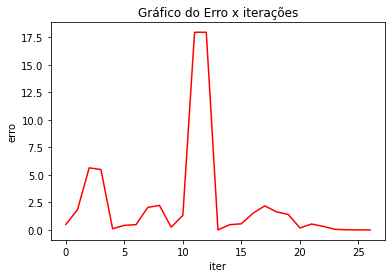

In [10]:

if __name__== '__main__':
  
  #Definição da função  
  f = lambda x: x**3 - x - 1
    
  print("""
        1 - Método da Bissecção
        2 - Método do Ponto Fixo
        3 - Método de Newton-raphson
        4 - Método da Secante
        """)
  escolha = int(input("Qual método usar? "))
  if escolha == 1:
    print("\n \t Método da Bissecção\n")
    a = 1.                         # valor de a em [a,b]
    b = 2.                         # valor de b em [a,b]
    err = 10**(-6)                  # Erro estimado
    sol,lerro = Bisseccao(f,a,b,err,100)
  elif escolha == 2:
    print("\n \t Método do Ponto Fixo\n")
    fphi = lambda x: (x + 1)**(1/3) #Definição da função Phi
    x0 = 1.                         # Chute inicial para xo
    err = 10**(-6)                  # Erro estimado
    sol,lerro = PontoFixo(f,fphi,x0,err,100)
  elif escolha == 3:
    print("\n \t Método de Newton-raphson\n")      
    df = lambda x: 3 * x**2 - 1 #Definição da sua derivada
    x0 = 0.                     # Chute inicial para xo
    err = 10**(-6)              # Erro estimado
    sol,lerro = NewtonRaphson(f,df,x0,err,100)
  elif escolha == 4:
    print("\n \t Método da Secante\n")
    x0 = 0.                 # Chute inicial para x0
    x1 = 0.5                # Chute inicial para x1
    err = 10**(-6)        # Erro estimado
    sol,lerro = Secante(f,x0,x1,err,100)